In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("D:/IBM - Internship/Data Analysis Using Python/Automobile_Price_prediction/CAR_DATA/Car_clean_df.csv")

In [3]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak- rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,turbo
0,0,3,121.742331,alfa-romero,two,convertible,rwd,front,88.6,0.413433,...,111.0,5000.0,21,27,13495,Low,0,1,1,0
1,1,3,121.742331,alfa-romero,two,convertible,rwd,front,88.6,0.413433,...,111.0,5000.0,21,27,16500,Low,0,1,1,0
2,2,2,164.000000,audi,four,sedan,4wd,front,99.4,0.529851,...,115.0,5500.0,18,22,17450,Low,0,1,1,0
3,3,2,121.742331,audi,two,sedan,fwd,front,99.8,0.540299,...,110.0,5500.0,19,25,15250,Low,0,1,1,0
4,4,1,158.000000,audi,four,sedan,fwd,front,105.8,0.770149,...,110.0,5500.0,19,25,17710,Low,0,1,1,0


## Identifying Feature Pattern 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           199 non-null    int64  
 1   symboling            199 non-null    int64  
 2   normalized-losses    199 non-null    float64
 3   make                 199 non-null    object 
 4   num-of-doors         199 non-null    object 
 5   body-style           199 non-null    object 
 6   drive-wheels         199 non-null    object 
 7   engine-location      199 non-null    object 
 8   wheel-base           199 non-null    float64
 9   length               199 non-null    float64
 10  width                199 non-null    float64
 11  height               199 non-null    float64
 12  curb-weight          199 non-null    int64  
 13  engine-type          199 non-null    object 
 14  num-of-cylinders     199 non-null    object 
 15  engine-size          199 non-null    int

#### Categorical data
make , num-of-doors , body-style , drive-wheels , engine-location , engine-type , num-of-cylinders , fuel-system , horsepower-binned

<AxesSubplot: xlabel='make', ylabel='price'>

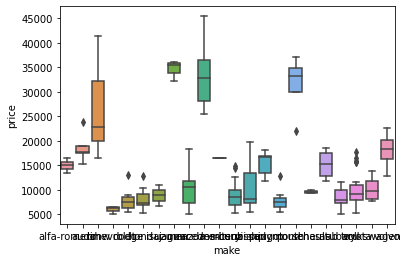

In [5]:
df['make'].value_counts()
sns.boxplot(x="make", y="price", data=df)

<AxesSubplot: xlabel='num-of-doors', ylabel='price'>

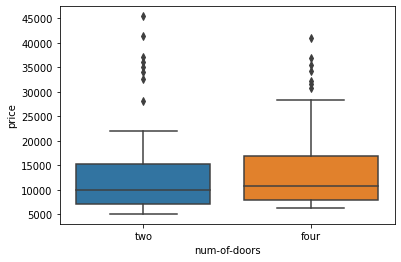

In [6]:
df['num-of-doors'].value_counts()
sns.boxplot(x="num-of-doors", y="price", data=df)

<AxesSubplot: xlabel='body-style', ylabel='price'>

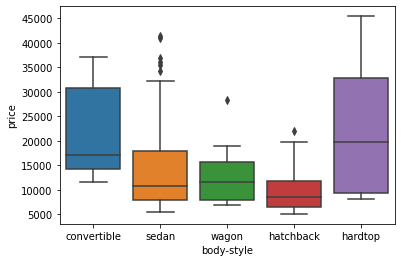

In [7]:
df['body-style'].value_counts()
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

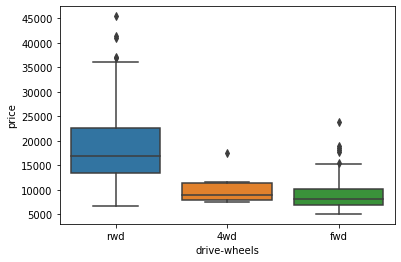

In [8]:
df['drive-wheels'].value_counts()
sns.boxplot(x="drive-wheels", y="price", data=df)

<AxesSubplot: xlabel='engine-location', ylabel='price'>

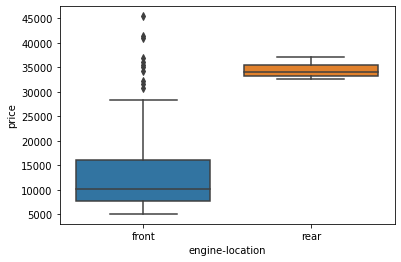

In [9]:
df['engine-location'].value_counts()
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot: xlabel='engine-type', ylabel='price'>

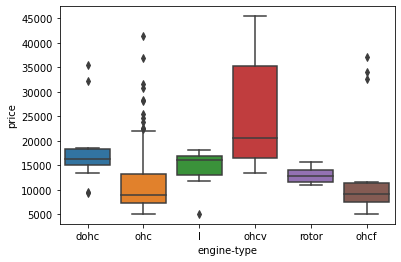

In [10]:
df['engine-type'].value_counts()
sns.boxplot(x="engine-type", y="price", data=df)

<AxesSubplot: xlabel='num-of-cylinders', ylabel='price'>

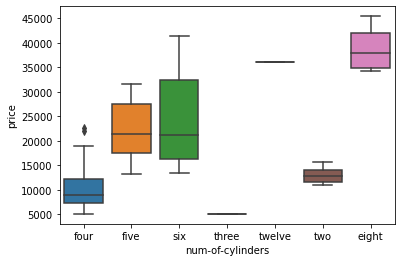

In [11]:
df['num-of-cylinders'].value_counts()
sns.boxplot(x="num-of-cylinders", y="price", data=df)

<AxesSubplot: xlabel='fuel-system', ylabel='price'>

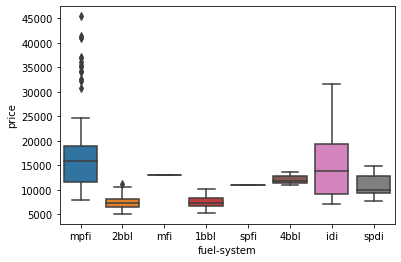

In [12]:
df['fuel-system'].value_counts()
sns.boxplot(x="fuel-system", y="price", data=df)

<AxesSubplot: xlabel='horsepower-binned', ylabel='price'>

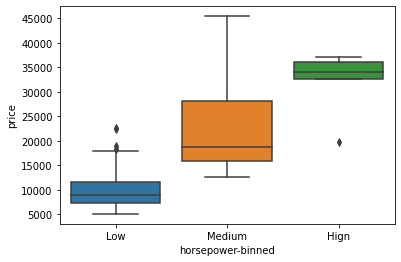

In [13]:
df['horsepower-binned'].value_counts()
sns.boxplot(x="horsepower-binned", y="price", data=df)

#### Numric data

In [14]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Print the column names
for col in numeric_columns:
    print(col)


Unnamed: 0
symboling
normalized-losses
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
peak- rpm
city-mpg
highway-mpg
price
fuel-type-diesel
fuel-type-gas
aspiration-type-std
turbo


In [16]:
numirical_data = [
'price',
'symboling',
'normalized-losses',
'wheel-base',
'length',
'width',
'height',
'curb-weight',
'engine-size',
'bore',
'stroke',
'compression-ratio',
'horsepower',
'peak- rpm',
'city-mpg',
'highway-mpg',
'fuel-type-diesel',
'fuel-type-gas',
'aspiration-type-std',
'turbo'
]
df[numirical_data].corr()

,price,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak- rpm,city-mpg,highway-mpg,fuel-type-diesel,fuel-type-gas,aspiration-type-std,turbo
price,1.000000,-0.083319,0.132571,0.587085,0.691525,0.753570,0.136731,0.834850,0.872880,0.557436,0.080860,0.071781,0.810913,-0.101700,-0.686448,-0.704387,0.111288,-0.111288,-0.181054,0.181054
symboling,-0.083319,1.000000,0.462930,-0.538178,-0.367041,-0.236506,-0.552509,-0.232263,-0.109371,-0.137923,-0.011127,-0.182252,0.075605,0.277277,-0.034196,0.037282,-0.195512,0.195512,0.052315,-0.052315
normalized-losses,0.132571,0.462930,1.000000,-0.058775,0.017165,0.085451,-0.377131,0.101506,0.114438,-0.027458,0.052370,-0.115028,0.218228,0.235979,-0.224197,-0.181093,-0.100023,0.100023,0.004000,-0.004000
wheel-base,0.587085,-0.538178,-0.058775,1.000000,0.876376,0.809109,0.589893,0.786197,0.576084,0.493235,0.161094,0.249698,0.378267,-0.362936,-0.475657,-0.547058,0.306906,-0.306906,-0.256232,0.256232
length,0.691525,-0.367041,0.017165,0.876376,1.000000,0.856795,0.491732,0.882905,0.687294,0.616190,0.124809,0.159492,0.584325,-0.287632,-0.667963,-0.699903,0.211274,-0.211274,-0.230278,0.230278
width,0.753570,-0.236506,0.085451,0.809109,0.856795,1.000000,0.297394,0.869606,0.733091,0.554939,0.181923,0.188775,0.621333,-0.248603,-0.639925,-0.685733,0.243458,-0.243458,-0.304541,0.304541
height,0.136731,-0.552509,-0.377131,0.589893,0.491732,0.297394,1.000000,0.310109,0.077028,0.176636,-0.061224,0.259257,-0.083632,-0.312347,-0.052469,-0.106855,0.281418,-0.281418,-0.089714,0.089714
curb-weight,0.834850,-0.232263,0.101506,0.786197,0.882905,0.869606,0.310109,1.000000,0.848714,0.660207,0.167270,0.157307,0.758747,-0.277831,-0.750090,-0.795176,0.221573,-0.221573,-0.322891,0.322891
engine-size,0.872880,-0.109371,0.114438,0.576084,0.687294,0.733091,0.077028,0.848714,1.000000,0.588455,0.209231,0.029728,0.823422,-0.255073,-0.650494,-0.679467,0.071209,-0.071209,-0.110724,0.110724
bore,0.557436,-0.137923,-0.027458,0.493235,0.616190,0.554939,0.176636,0.660207,0.588455,1.000000,-0.046741,-0.002494,0.595417,-0.272439,-0.605579,-0.610602,0.050229,-0.050229,-0.224486,0.224486


In [19]:
Strong_corr_price = [
'price',
'wheel-base',
'length',
'width',
'curb-weight',
'engine-size',
'bore',
'horsepower',
'city-mpg',
'highway-mpg',
]

In [20]:
corr_matrix = df[Strong_corr_price].corr()
corr_matrix

,price,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg
price,1.000000,0.587085,0.691525,0.753570,0.834850,0.872880,0.557436,0.810913,-0.686448,-0.704387
wheel-base,0.587085,1.000000,0.876376,0.809109,0.786197,0.576084,0.493235,0.378267,-0.475657,-0.547058
length,0.691525,0.876376,1.000000,0.856795,0.882905,0.687294,0.616190,0.584325,-0.667963,-0.699903
width,0.753570,0.809109,0.856795,1.000000,0.869606,0.733091,0.554939,0.621333,-0.639925,-0.685733
curb-weight,0.834850,0.786197,0.882905,0.869606,1.000000,0.848714,0.660207,0.758747,-0.750090,-0.795176
engine-size,0.872880,0.576084,0.687294,0.733091,0.848714,1.000000,0.588455,0.823422,-0.650494,-0.679467
bore,0.557436,0.493235,0.616190,0.554939,0.660207,0.588455,1.000000,0.595417,-0.605579,-0.610602
horsepower,0.810913,0.378267,0.584325,0.621333,0.758747,0.823422,0.595417,1.000000,-0.821449,-0.804607
city-mpg,-0.686448,-0.475657,-0.667963,-0.639925,-0.750090,-0.650494,-0.605579,-0.821449,1.000000,0.972150
highway-mpg,-0.704387,-0.547058,-0.699903,-0.685733,-0.795176,-0.679467,-0.610602,-0.804607,0.972150,1.000000


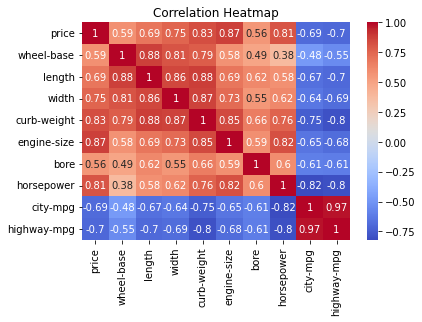

In [21]:
corr_matrix = df[Strong_corr_price].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, cbar=True)
plt.title('Correlation Heatmap')

plt.show()

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>